In this part, I will try to see:
- What do I know about the data?
- What the data is used for?
- what does each field mean?
- and more

This dataset is obtained from the results of scraping data Meteorological, Climatological, and Geophysical Agency. 

Earthquakes were recorded from January 2019 to April 2023.

# Import Packages

In [2]:
#Commonly used libraries
import pandas as pd
import numpy as np

#Libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot

#Additional libraries
import datetime as dt
import time

- Pandas is a library that used to process data, starting from cleaning data, manipulating data, to performing data analysis like importing datasets.
- Numpy is a library that provides functions to do scientific calculations numerical data such as matrices, algebra, statistics, and so on.
- Seaborn is based on matplotlib, but it provides a high-level interface for drawing attractive and informative statistical graphics.
- Plotly express is a high-level data visualization package that allows you to create interactive plots with very little code.
- Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations.
- The datetime module supplies classes for manipulating dates and times.

Source: information from each website

# Load & Display the Dataset

In [69]:
data = pd.read_table('Data Science/dataset_earthquakes.tsv')
data.head()

Unnamed: 0      eventID                          datetime  latitude  \
0       56577  bmg2019ahic  2019-01-05 00:02:19.243788+00:00 -8.855476   
1       56578  bmg2019ahij  2019-01-05 00:10:46.341458+00:00  1.779001   
2       56579  bmg2019ahjz  2019-01-05 00:59:05.203033+00:00  0.435449   
3       56580  bmg2019ahkd  2019-01-05 01:04:20.106873+00:00  4.329032   
4       56581  bmg2019ahlv  2019-01-05 01:55:38.881195+00:00 -0.840817   

    longitude  magnitude mag_type  depth  phasecount  azimuth_gap  ...  \
0  116.786026   2.084646      MLv     35         8.0   204.235542  ...   
1  126.480248   4.361245      MLv     97        34.0    72.024076  ...   
2  100.684746   4.332770      MLv    240        26.0   147.728729  ...   
3  126.179474   5.091639       Mw    107        75.0   226.443036  ...   
4  127.626923   5.108770       Mw     10       125.0    70.261945  ...   

  doubleCouple      clvd   strikeNP1     dipNP1     rakeNP1   strikeNP2  \
0          NaN       NaN         NaN        NaN         NaN         NaN   
1          NaN       NaN         NaN        NaN         NaN         NaN   
2          NaN       NaN         NaN        NaN         NaN         NaN   
3     0.956131  0.043869  168.219918  86.845533  -24.532362  259.658614   
4     0.735399  0.264601  329.476841  86.714016  171.935077   59.942188   

      dipNP2     rakeNP2     azgapFM    misfit  
0        NaN         NaN         NaN       NaN  
1        NaN         NaN         NaN       NaN  
2        NaN         NaN         NaN       NaN  
3  65.507254 -176.533241  226.443036  0.199065  
4  81.948425    3.318735   70.261945  0.159476  

[5 rows x 38 columns]

The field's values in the data are separated by tab characters, so we so can use the "pd.read_table" function to display the dataset from file with .tsv extention. 

# Preprocessing Data - Exploratory Data Analysis (EDA)

## > dataset analysis

From this, we have obtained information that the dataset consists of 38 columns with different data types and amounts of data.

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45938 entries, 0 to 45937
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         45938 non-null  int64  
 1   eventID            45938 non-null  object 
 2   datetime           45938 non-null  object 
 3   latitude           45938 non-null  float64
 4   longitude          45938 non-null  float64
 5   magnitude          45879 non-null  float64
 6   mag_type           45879 non-null  object 
 7   depth              45938 non-null  int64  
 8   phasecount         45936 non-null  float64
 9   azimuth_gap        45938 non-null  float64
 10  location           45938 non-null  object 
 11  agency             45938 non-null  object 
 12  datetimeFM         1895 non-null   object 
 13  latFM              1895 non-null   float64
 14  lonFM              1895 non-null   float64
 15  magFM              1836 non-null   float64
 16  magTypeFM          183

## > columns selection

Columns selection aims to select the required fields from dataset.

In [71]:
data.columns

Index(['Unnamed: 0', 'eventID', 'datetime', 'latitude', 'longitude',
       'magnitude', 'mag_type', 'depth', 'phasecount', 'azimuth_gap',
       'location', 'agency', 'datetimeFM', 'latFM', 'lonFM', 'magFM',
       'magTypeFM', 'depthFM', 'phasecountFM', 'AzGapFM', 'scalarMoment',
       'Mrr', 'Mtt', 'Mpp', 'Mrt', 'Mrp', 'Mtp', 'varianceReduction',
       'doubleCouple', 'clvd', 'strikeNP1', 'dipNP1', 'rakeNP1', 'strikeNP2',
       'dipNP2', 'rakeNP2', 'azgapFM', 'misfit'],
      dtype='object')

In [72]:
data_fixed = data.loc[:, ['datetime', 'latitude', 'longitude', 'magnitude', 'depth', 'location']]
data_fixed.head(10)

datetime  latitude   longitude  magnitude  depth  \
0  2019-01-05 00:02:19.243788+00:00 -8.855476  116.786026   2.084646     35   
1  2019-01-05 00:10:46.341458+00:00  1.779001  126.480248   4.361245     97   
2  2019-01-05 00:59:05.203033+00:00  0.435449  100.684746   4.332770    240   
3  2019-01-05 01:04:20.106873+00:00  4.329032  126.179474   5.091639    107   
4  2019-01-05 01:55:38.881195+00:00 -0.840817  127.626923   5.108770     10   
5  2019-01-05 01:59:23.229433+00:00 -0.899501  127.509125   4.725267     10   
6  2019-01-05 02:10:17.091923+00:00 -1.074624  127.060150   3.385472     10   
7  2019-01-05 02:15:32.771319+00:00 -0.917148  127.643356   2.685277     10   
8  2019-01-05 02:18:56.235258+00:00 -0.876158  127.580383   2.583779     10   
9  2019-01-05 02:21:10.779446+00:00 -0.932854  127.469032   3.627732     10   

                      location  
0    Sumbawa Region, Indonesia  
1         Northern Molucca Sea  
2  Northern Sumatra, Indonesia  
3    Talaud Islands, Indonesia  
4         Halmahera, Indonesia  
5         Halmahera, Indonesia  
6         Halmahera, Indonesia  
7         Halmahera, Indonesia  
8         Halmahera, Indonesia  
9         Halmahera, Indonesia

## > get more information

- The dataset comprised 45,938 rows and 38 variables.
- Q1, Q2 and Q3 from depth field are 10, 13 and 43.
- From the 51 locations, Sulawesi has the highest recorded earthquakes (4,401 times)
- On average, the recorded earthquakes occurred at approximately 48,1 km depth and 3,5 magnitude

In [73]:
data_fixed.describe()

latitude     longitude     magnitude         depth
count  45938.000000  45938.000000  45879.000000  45938.000000
mean      -3.299177    119.402675      3.516593     48.101985
std        4.325509     10.965226      0.847352     84.486156
min      -10.998043     95.006195      0.638354      1.000000
25%       -7.699983    113.615026      2.910043     10.000000
50%       -2.867882    121.355045      3.434301     13.000000
75%        0.191312    127.048719      4.060254     43.000000
max        5.998381    140.998291      7.894698    750.000000

In [74]:
data_fixed.describe(exclude=np.number)

datetime             location
count                              45938                45938
unique                             45938                   51
top     2019-01-05 00:02:19.243788+00:00  Sulawesi, Indonesia
freq                                   1                 4401

## > data manipulation (datetime)

In [75]:
data_fixed['datetime'] = pd.to_datetime(data_fixed['datetime'])
data_fixed['date'] = pd.to_datetime(data_fixed['datetime'].dt.date)
data_fixed['month'] = data_fixed['datetime'].dt.strftime('%m')
data_fixed['year'] = data_fixed['datetime'].dt.strftime('%Y')

data_fixed.head()

datetime  latitude   longitude  magnitude  depth  \
0 2019-01-05 00:02:19.243788+00:00 -8.855476  116.786026   2.084646     35   
1 2019-01-05 00:10:46.341458+00:00  1.779001  126.480248   4.361245     97   
2 2019-01-05 00:59:05.203033+00:00  0.435449  100.684746   4.332770    240   
3 2019-01-05 01:04:20.106873+00:00  4.329032  126.179474   5.091639    107   
4 2019-01-05 01:55:38.881195+00:00 -0.840817  127.626923   5.108770     10   

                      location       date month  year  
0    Sumbawa Region, Indonesia 2019-01-05    01  2019  
1         Northern Molucca Sea 2019-01-05    01  2019  
2  Northern Sumatra, Indonesia 2019-01-05    01  2019  
3    Talaud Islands, Indonesia 2019-01-05    01  2019  
4         Halmahera, Indonesia 2019-01-05    01  2019

## > create categorization

In [76]:
#Categorize depth
depth_scales = [-.01, 70, 300, 800]
depth_labels = ['Shallow', 'Medium', 'Deep']
data_fixed['depth_cat'] = pd.cut(data_fixed['depth'], 
                                 bins=depth_scales, 
                                 labels=depth_labels).astype('category')

#Categorize magnitude
mag_scales = [-.01, 2.5, 5.4, 6.0, 6.9, 7.9, 9.5]
data_fixed['mag_cat'] = pd.cut(data_fixed['magnitude'], 
                               bins=mag_scales).cat.codes

data_fixed.head()

datetime  latitude   longitude  magnitude  depth  \
0 2019-01-05 00:02:19.243788+00:00 -8.855476  116.786026   2.084646     35   
1 2019-01-05 00:10:46.341458+00:00  1.779001  126.480248   4.361245     97   
2 2019-01-05 00:59:05.203033+00:00  0.435449  100.684746   4.332770    240   
3 2019-01-05 01:04:20.106873+00:00  4.329032  126.179474   5.091639    107   
4 2019-01-05 01:55:38.881195+00:00 -0.840817  127.626923   5.108770     10   

                      location       date month  year depth_cat  mag_cat  
0    Sumbawa Region, Indonesia 2019-01-05    01  2019   Shallow        0  
1         Northern Molucca Sea 2019-01-05    01  2019    Medium        1  
2  Northern Sumatra, Indonesia 2019-01-05    01  2019    Medium        1  
3    Talaud Islands, Indonesia 2019-01-05    01  2019    Medium        1  
4         Halmahera, Indonesia 2019-01-05    01  2019   Shallow        1

## > rearrange columns

In [77]:
data_fixed = data_fixed.reindex(columns=['datetime', 
                                         'date', 
                                         'month', 
                                         'year', 
                                         'latitude', 
                                         'longitude', 
                                         'magnitude', 
                                         'mag_cat', 
                                         'depth', 
                                         'depth_cat', 
                                         'location'])
data_fixed.head()

datetime       date month  year  latitude  \
0 2019-01-05 00:02:19.243788+00:00 2019-01-05    01  2019 -8.855476   
1 2019-01-05 00:10:46.341458+00:00 2019-01-05    01  2019  1.779001   
2 2019-01-05 00:59:05.203033+00:00 2019-01-05    01  2019  0.435449   
3 2019-01-05 01:04:20.106873+00:00 2019-01-05    01  2019  4.329032   
4 2019-01-05 01:55:38.881195+00:00 2019-01-05    01  2019 -0.840817   

    longitude  magnitude  mag_cat  depth depth_cat  \
0  116.786026   2.084646        0     35   Shallow   
1  126.480248   4.361245        1     97    Medium   
2  100.684746   4.332770        1    240    Medium   
3  126.179474   5.091639        1    107    Medium   
4  127.626923   5.108770        1     10   Shallow   

                      location  
0    Sumbawa Region, Indonesia  
1         Northern Molucca Sea  
2  Northern Sumatra, Indonesia  
3    Talaud Islands, Indonesia  
4         Halmahera, Indonesia

## > check for missing value

From this, we conclude that the magnitude field has 59 blank data (NaN)

In [78]:
data_fixed.isna().sum()

datetime      0
date          0
month         0
year          0
latitude      0
longitude     0
magnitude    59
mag_cat       0
depth         0
depth_cat     0
location      0
dtype: int64

There are several ways to deal with empty data:
- Delete data
- Fill in with the previous average
- Fill in random data

Because the empty data with NaN is only a small part of the whole data, it is better to delete it.

## > deleting empty data rows

In [79]:
data_fixed = data_fixed.dropna(subset='magnitude').reset_index(drop=True)
data_fixed.isna().sum()

datetime     0
date         0
month        0
year         0
latitude     0
longitude    0
magnitude    0
mag_cat      0
depth        0
depth_cat    0
location     0
dtype: int64

## > check duplicate data

In [80]:
data_fixed.duplicated().sum()

0

No duplicate data

In [81]:
data_fixed.head()

datetime       date month  year  latitude  \
0 2019-01-05 00:02:19.243788+00:00 2019-01-05    01  2019 -8.855476   
1 2019-01-05 00:10:46.341458+00:00 2019-01-05    01  2019  1.779001   
2 2019-01-05 00:59:05.203033+00:00 2019-01-05    01  2019  0.435449   
3 2019-01-05 01:04:20.106873+00:00 2019-01-05    01  2019  4.329032   
4 2019-01-05 01:55:38.881195+00:00 2019-01-05    01  2019 -0.840817   

    longitude  magnitude  mag_cat  depth depth_cat  \
0  116.786026   2.084646        0     35   Shallow   
1  126.480248   4.361245        1     97    Medium   
2  100.684746   4.332770        1    240    Medium   
3  126.179474   5.091639        1    107    Medium   
4  127.626923   5.108770        1     10   Shallow   

                      location  
0    Sumbawa Region, Indonesia  
1         Northern Molucca Sea  
2  Northern Sumatra, Indonesia  
3    Talaud Islands, Indonesia  
4         Halmahera, Indonesia

## > saving fixed data

In [82]:
data_fixed.to_csv('Data Science/earthquakes_fixed.csv')

# Data Visualization

## > Earthquakes frequency in Indonesia for the last 5 years

In [83]:
data_year = data_fixed.groupby(['year',])['date'].count().reset_index().rename(columns={'date':'count'})
data_year.sort_values(['year'])

year  count
0  2019  11445
1  2020   9142
2  2021  11199
3  2022  10353
4  2023   3740

In [85]:
fig = px.bar(
    data_year, y='year', x='count',
    text_auto='.2s',
    category_orders={'Tahun': ['2019', '2020', '2021', '2022', '2023']},
    color=['#437dce', '#437dce', '#437dce', '#437dce', '#437dce'],
    color_discrete_map="identity",
    width=780
)

fig.update_layout(
    title="<b>Earthquakes Frequency in Indonesia</b><br><sub>Year</sub>",
    xaxis_title="Freq",
    yaxis_title="",
    plot_bgcolor='#fbfbfa'
)

fig.show()

## > Types of Depth of Earthquakes in Indonesia in The Last 5 Years

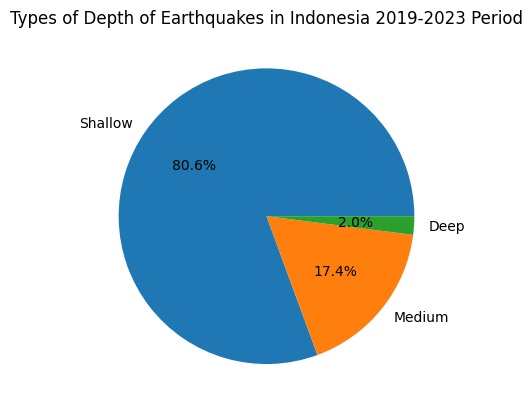

In [86]:
labels = ['Shallow', 'Medium', 'Deep']
values = data_fixed['depth_cat'].value_counts().values
plt.pie(values, labels = labels, autopct='%1.1f%%')
plt.title('Types of Depth of Earthquakes in Indonesia 2019-2023 Period')
plt.show()

## > The Corelation of Magnitude to Earthquake Depth Levels in Indonesia

In [91]:
fig = px.histogram(data_fixed, x='magnitude', facet_row='depth_cat')

for i in range(3):
    fig['data'][i]['marker']['color'] = '#437dce'

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))

fig.update_layout(
    title="<b>The Corelation of Magnitude to Earthquake Depth Levels in Indonesia 2019-2023</b>",
    xaxis_title="Magnitude</br><sub>",
    showlegend=False,
    plot_bgcolor='#fbfbfa'
)

fig.update_yaxes(visible=False, fixedrange=True)

fig.show()

## > Earthquakes Distribution Data in Indonesia

In [92]:
data_location = data_fixed.groupby(['location'])[['latitude', 'longitude']].median().reset_index().rename(columns={'latitude':'median_latitude', 'longitude':'median_longitude'})

data_location_count = data_fixed.groupby(['location'])['date'].count().reset_index().rename(columns={'date':'count'})

data_location_count = pd.merge(
    data_location, data_location_count,
    how='inner', on=['location']
)

data_location_count['location_short'] = data_location_count['location'].str.split(",", expand = True)[0] 

data_location_count.loc[data_location_count['count']<data_location_count['count'].quantile(0.8), 'location_short']='' 

data_location_count.head()

location  median_latitude  median_longitude  count  \
0                    Arafura Sea        -9.625705        134.877449     10   
1  Aru Islands Region, Indonesia        -5.387751        133.738327     65   
2         Bali Region, Indonesia        -8.254019        115.399776    516   
3                       Bali Sea        -7.861933        117.344177    323   
4                      Banda Sea        -6.564980        129.301483   2029   

  location_short  
0                 
1                 
2                 
3                 
4      Banda Sea

In [93]:
location_count = data.groupby(pd.Grouper(key='location')).size().reset_index(name='count')
location_count_top = location_count.nlargest(10, 'count')[['location', 'count']]
fig = px.bar(location_count_top, x='location', y='count', color='location', text='count')
fig.update_layout(title_text='Top 10 Earthquake Locations in Indonesia for 2019-2023',
                  title_x=0.5, title_font=dict(size=30))
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

In [96]:
fig = px.scatter_geo(data_location_count, 
                    lat='median_latitude',
                    lon='median_longitude',
                    size='count',
                    text='location_short',
                    hover_name='location',
                    hover_data={'median_latitude':False,'median_longitude':False, 'location_short':False})

fig.update_geos(
    visible=True, resolution=110,
    showcountries=True, countrycolor="#000080" 
)

fig.update_traces(
    textfont_size=15,
    marker=dict(color='rgba(67, 125, 206, 0.85)')
)

fig.update_layout(
    title_text = "<b>Distribution of Earthquakes in Indonesia 2019-2023 Period</b>",
    geo=dict(
        lonaxis = dict(
            range= [93, 144],
            dtick = 5
        ),
        lataxis = dict (
            range= [-13, 10],
            dtick = 5
        )
    )
)

fig.show()

In [97]:
fig = px.density_mapbox(data_fixed, lat=data_fixed['latitude'], lon=data_fixed['longitude'], z=data_fixed['magnitude'],
                        center=dict(lat=-0.789275, lon=113.921327), zoom=3.5,
                        mapbox_style="stamen-terrain",
                        radius=5,
                        opacity=0.5,
                        animation_frame=pd.DatetimeIndex(data_fixed['date']).year)
fig.update_layout(title_text='Distribution of Earthquakes in Indonesia in 2019-2023',
                  title_x=0.5, title_font=dict(size=32))
fig.show()

From this visualization, we can conclude that:
- Earthquakes at shallow depths are more frequent.
- Earthquakes at deeper depths tend to have higher magnitudes.
- From all over Indonesia, Sulawesi is one of the places most prone to earthquakes. Bbecause this island is the meeting point of three tectonic plates, the Pacific Plate which is moving westward, the Eurasian Plate which is moving towards the South-South, and the smaller Philippine Plate. The meeting of three plates on Sulawesi has caused complex and varied geological impacts. One of them is the formation of faults that trigger earthquakes.
- Based on data for the last 5 years, it can be predicted that Sulawesi will continue to be the area with the highest number of earthquakes followed by other regions in Indonesia.
- Kalimantan is located in an area far from the plate collision zone (megathrust). This makes Kalimantan less prone to earthquakes.
- The average recorded earthquakes has a small magnitude so that it does not have the potential to cause a tsunami.